# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as test_data:
    test = pickle.load(test_data)

In [3]:
X_train, y_train = train['features'] , train['labels']
X_validation, y_validation = valid['features'] , valid['labels']
X_test, y_test = test['features'] , test['labels']

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(X_test.shape)
print(y_test.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
(12630, 32, 32, 3)
(12630,)


# Image Exploration

1

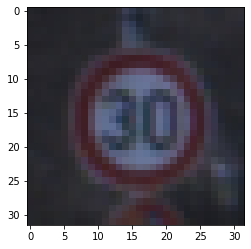

In [5]:
i = 4000
plt.imshow(X_train[i])
y_train[i]

# Data Preparation
1. Shuffling
2. Converting to Gray Scale image
3. Data Normalization

In [6]:
#shuffling
from sklearn.utils import shuffle
X_train , y_train = shuffle(X_train,y_train)

In [7]:
# Color image to Gray Scale

X_train_gray = np.sum(X_train/3 , axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3 , axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3 , axis = 3, keepdims = True)
print(X_train_gray.shape)
print(X_validation_gray.shape)
print(X_test_gray.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [8]:
# Data Normalization (Ranges from -1 to 1) (Maintaining center portion of the image by performing -128 and /128)

X_train_gray_norm = (X_train_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

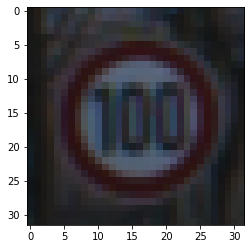

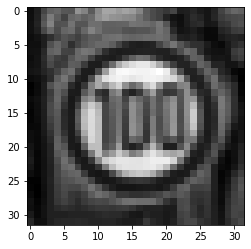

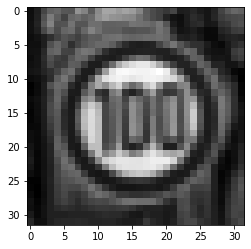

In [9]:
# Data Visualization

i = 4000
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# Build Model

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [11]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size = (10,10), activation = 'relu', input_shape = (32,32,1) ) )
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size = (10,10), activation = 'relu') )
cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 300, activation = 'relu'))

cnn_model.add(Dense(units = 160, activation = 'relu'))

cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [12]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])

In [13]:
history = cnn_model.fit(X_train_gray_norm,y_train, batch_size=500, epochs=10, verbose=1, validation_data=(X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 6s 183us/step - loss: 3.2144 - accuracy: 0.1497 - val_loss: 2.6876 - val_accuracy: 0.2730
Epoch 2/10
34799/34799 [==============================] - 6s 178us/step - loss: 1.7239 - accuracy: 0.5085 - val_loss: 1.4813 - val_accuracy: 0.5460
Epoch 3/10
34799/34799 [==============================] - 6s 185us/step - loss: 0.9578 - accuracy: 0.7242 - val_loss: 0.9208 - val_accuracy: 0.7531
Epoch 4/10
34799/34799 [==============================] - 7s 191us/step - loss: 0.6448 - accuracy: 0.8242 - val_loss: 0.7665 - val_accuracy: 0.7701
Epoch 5/10
34799/34799 [==============================] - 7s 210us/step - loss: 0.4935 - accuracy: 0.8656 - val_loss: 0.6731 - val_accuracy: 0.8129
Epoch 6/10
34799/34799 [==============================] - 8s 226us/step - loss: 0.4040 - accuracy: 0.8900 - val_loss: 0.6088 - val_accuracy: 0.8313
Epoch 7/10
34799/34799 [==============================] - 8s 22

# Model Evaluation

In [14]:
score = cnn_model.evaluate(X_test_gray_norm,  y_test)
print('Test Accuracy : {}'.format(score[1]))

12630/12630 [==============================] - 1s 91us/step
Test Accuracy : 0.8533650040626526


In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

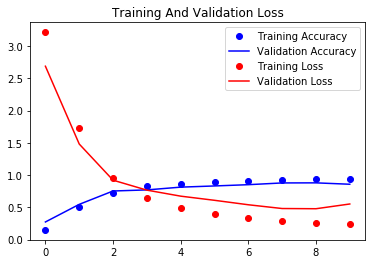

In [17]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()

plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()

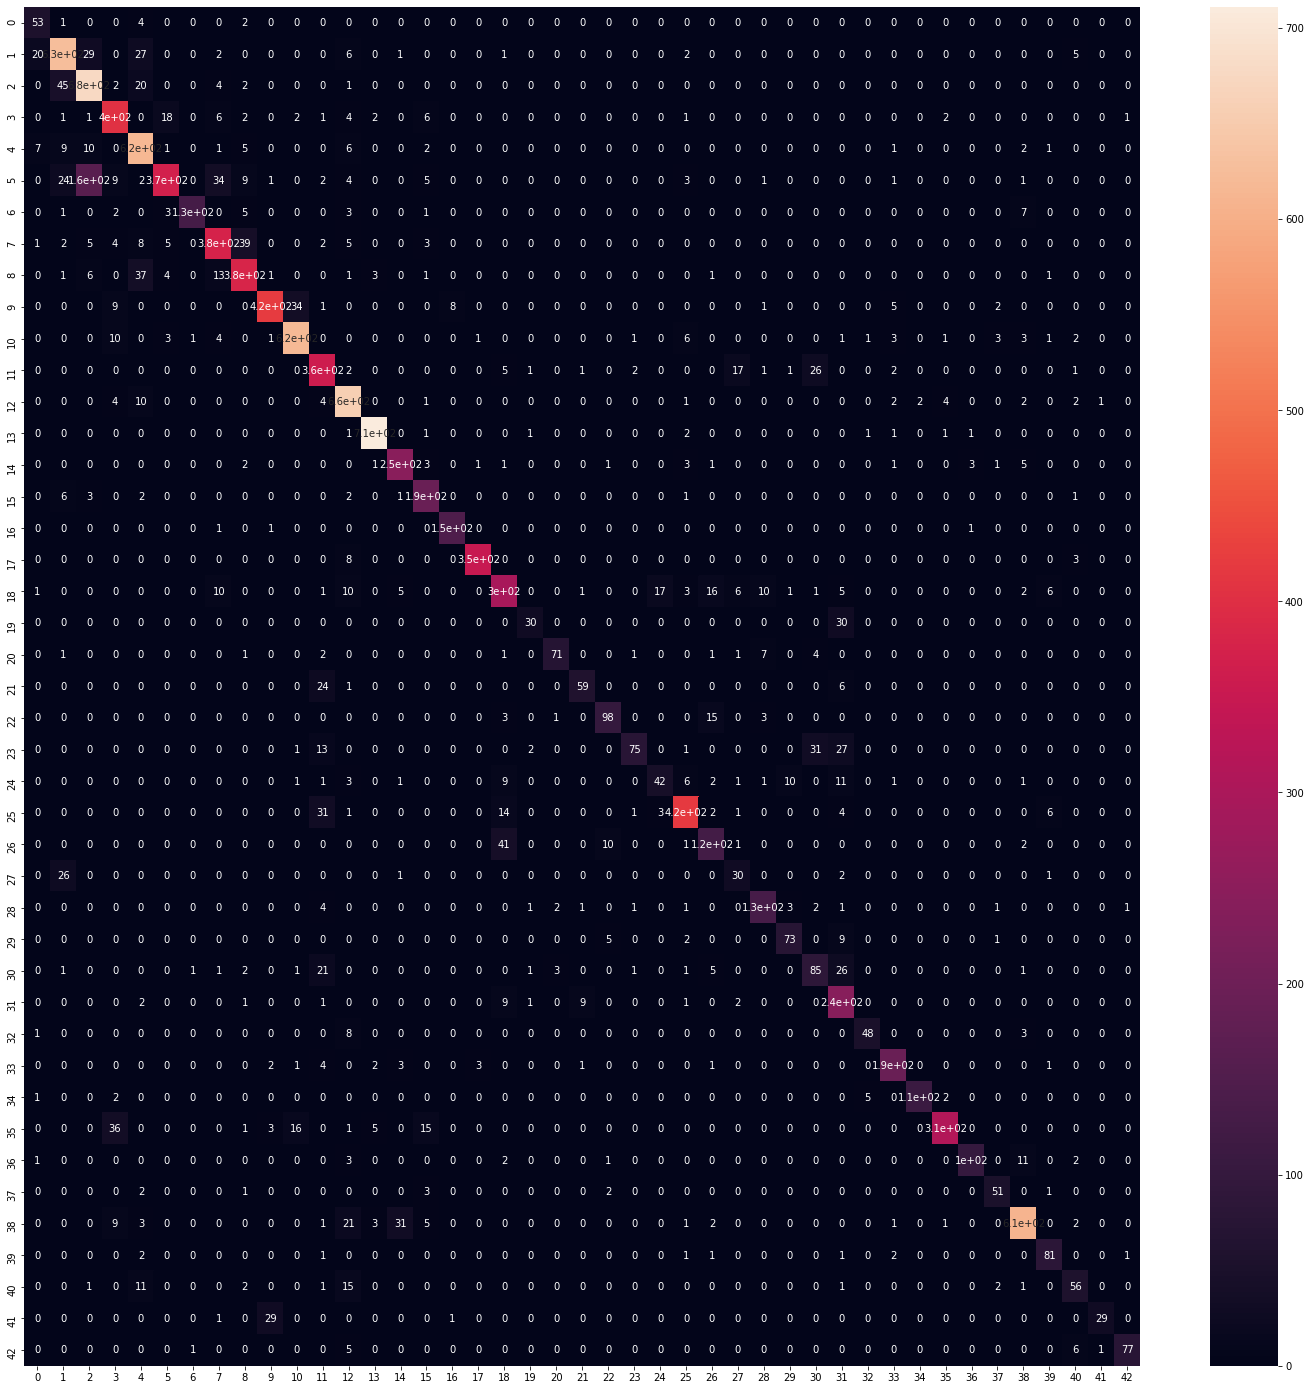

In [18]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

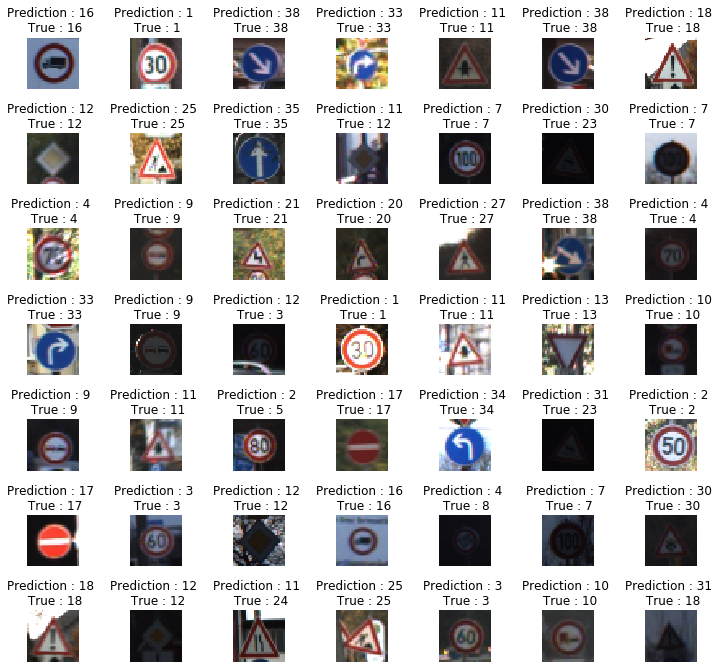

In [19]:
L = 7
W = 7
fig,axes = plt.subplots(L,W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction : {} \n True : {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)